## ECE 475 Frequentist Machine Learning Linear Regression Project

Prof. Keene

Jing Jiang

For this assignment, I used the dataset of Boston house-prices from sci-kit. I performed plain linear regression, ridge regression and LASSO regression to the data and printed out the min square errors for the test datasets.

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 10.0)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [285]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [286]:
x = boston.data
y = boston.target

In [287]:
x_train_and_val, x_test, y_train_and_val, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train_and_val, y_train_and_val, test_size=0.11111, random_state=1)

* ## Linear Regression

In [288]:
lr = np.linalg.inv(x_train_and_val.T @ x_train_and_val) @ x_train_and_val.T @ y_train_and_val

mse_lr_train = np.mean((y_train - x_train @ lr) ** 2)
mse_lr = np.mean((y_test - x_test @ lr) ** 2)

print("MSE for training set:")
print(mse_lr_train)
print("MSE for test set:")
print(mse_lr)

MSE for training set:
25.865443088039395
MSE for test set:
19.365198593649538


After linear regression is performed, the output stated that the mse for training set is 25.87 and for test set it is 19.37

* ## Ridge Regression

In [289]:
lbd_ridge = None
min_mse = float('inf')

lbds = np.arange(0, 1, 0.05)

for lbd in lbds:
    ridge = np.linalg.inv(x_train.T @ x_train + lbd * np.eye(d)) @ x_train.T @ y_train
    mse_val = np.mean((y_val - x_val @ ridge)**2)
    if mse_val < min_mse:
        min_mse = mse_val
        lbd_ridge = lbd
        

ridge = np.linalg.inv(x_test.T @ x_test + lbd_ridge * np.eye(d)) @ x_test.T @ y_test

mse_ridge_train = np.mean((y_train - x_train @ ridge) ** 2)
mse_ridge = np.mean((y_test - x_test @ ridge)**2)

print("MSE for training set:")
print(mse_ridge_train)

print("MSE for test set:")
print(mse_ridge)


MSE for training set:
34.853379948745285
MSE for test set:
14.425116858159972


The mse for training set is 34.85 and for the test set it is 14.43. We can see that for the test dataset, Ridge Regression provides a lower MSE.

* ## Lasso Regression

In [290]:
from sklearn.linear_model import Lasso
alpha = 0.04
lasso = Lasso(alpha=alpha)

lasso.fit(x_train,y_train)

y_laso_pd=lasso.predict(x_test)

mse_lasso = mean_squared_error(y_test,y_laso_pd)

print("MSE for test set:")
print(mse_lasso)

MSE for test set:
20.889845522713067


.

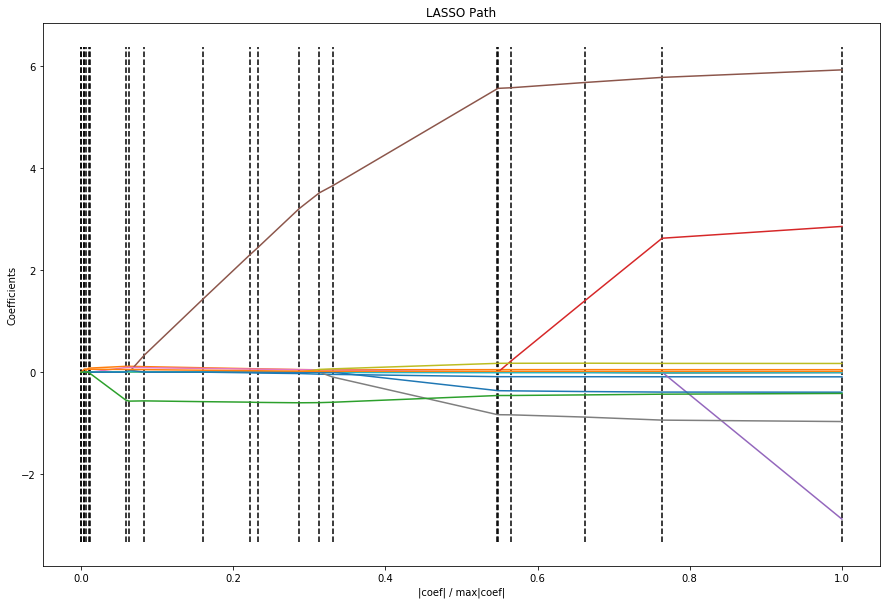

In [291]:
_, _, coefs = linear_model.lars_path(x, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()